In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [2]:
os.environ['KAGGLE_USERNAME'] = "thadimarrisameer"
os.environ['KAGGLE_KEY'] = "c6e3da0e9ef403fd472525cc34d60421"

In [3]:
# Downloading Covid-19 dataset from Kaggle
!kaggle datasets download tawsifurrahman/covid19-radiography-database

covid19-radiography-database.zip: Skipping, found more recently modified local copy (use --force to force download)


## Total Covid Images In Dataset


In [4]:
len(os.listdir('covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images'))

3616

In [5]:
df = pd.read_excel('covid19-radiography-database/COVID-19_Radiography_Dataset/COVID.metadata.xlsx')
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


## Below is the X-Ray image of a person suffering from Covid-19.

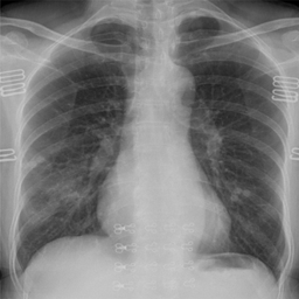

In [6]:
img = "covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images/COVID-54.png"
PIL.Image.open(img)

## Total Normal Chest X-ray Images In Dataset

In [7]:
len(os.listdir('covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images'))

10192

In [8]:
df = pd.read_excel('covid19-radiography-database/COVID-19_Radiography_Dataset/Normal.metadata.xlsx')
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


## Below is the X-Ray Image Of Normal Lungs


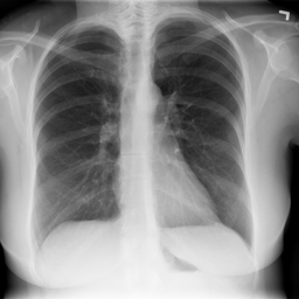

In [9]:
img = "covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images/Normal-4.png"
PIL.Image.open(img)

# Loading The Training and Validation Images From the Dataset

In [10]:
urls = os.listdir('covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images')
# print(urls)
path = "covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images"+urls[0]

In [11]:
path

'covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/imagesCOVID-1.png'

In [12]:
def loadImages(path,urls,target):
    images=[]
    labels=[]
    for i in range(len(urls)):
        img_path = path+"/"+urls[i]
        img = cv2.imread(img_path)
        img = img/255.0
        img = cv2.resize(img, (100,100))
        images.append(img)
        labels.append(target)
    images = np.asanyarray(images)
    return images,labels

In [13]:
# Loading CovidDataset Images 
covidPath = "covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covidPath)
covidImages, covidTargets = loadImages(covidPath,covidUrl,1)

In [14]:
# Loading NormalDataset images
normalPath = "covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images"
normalUrl = os.listdir(normalPath)
normalImages , normalTargets = loadImages(normalPath,normalUrl,0)

In [15]:
covidImages = np.asarray(covidImages)
normalImages = np.asarray(normalImages)
covidImages.shape

(3616, 100, 100, 3)

In [16]:
normalImages.shape

(10192, 100, 100, 3)

In [17]:
# Concatenating Both Normal Images and Covid19 Images
Mixed_Datasets = np.r_[covidImages,normalImages]
Mixed_Datasets.shape

(13808, 100, 100, 3)

In [18]:
Targets = np.r_[covidTargets, normalTargets]

# Developing a Convolutional Neural Network for the classification task

In [19]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [20]:
x_train, x_test, y_train, y_test = train_test_split(Mixed_Datasets,Targets,test_size=0.25)

In [21]:
# model = Sequential([
#     Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
#     MaxPooling2D(),
#     Conv2D(16, 3, activation='relu'),
#     MaxPooling2D(),
#     Conv2D(16, 3, activation='relu'),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(512,activation='relu'),
#     Dense(256,activation='relu'),
#     Dense(1,activation='sigmoid')
# ])

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(100,100,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       7

## Using the Adam optmizer

In [23]:
model.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=10,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1036/1036 [==============================] - 75s 71ms/step - loss: 0.3758 - accuracy: 0.8244 - val_loss: 0.2653 - val_accuracy: 0.8876
Epoch 2/10
1036/1036 [==============================] - 75s 73ms/step - loss: 0.2701 - accuracy: 0.8820 - val_loss: 0.2494 - val_accuracy: 0.9044
Epoch 3/10
1036/1036 [==============================] - 72s 70ms/step - loss: 0.2087 - accuracy: 0.9132 - val_loss: 0.2030 - val_accuracy: 0.9157
Epoch 4/10
1036/1036 [==============================] - 73s 71ms/step - loss: 0.1702 - accuracy: 0.9326 - val_loss: 0.1614 - val_accuracy: 0.9354
Epoch 5/10
1036/1036 [==============================] - 72s 70ms/step - loss: 0.1487 - accuracy: 0.9414 - val_loss: 0.1403 - val_accuracy: 0.9481
Epoch 6/10
1036/1036 [==============================] - 73s 71ms/step - loss: 0.1279 - accuracy: 0.9499 - val_loss: 0.1324 - val_accuracy: 0.9525
Epoch 7/10
1036/1036 [==============================] - 77s 75ms/step - loss: 0.1106 - accuracy: 0.9567 - val_loss: 0.1450 -

# Plotting the training and validation accuracy with respect to the number of epochs

<Figure size 640x480 with 0 Axes>

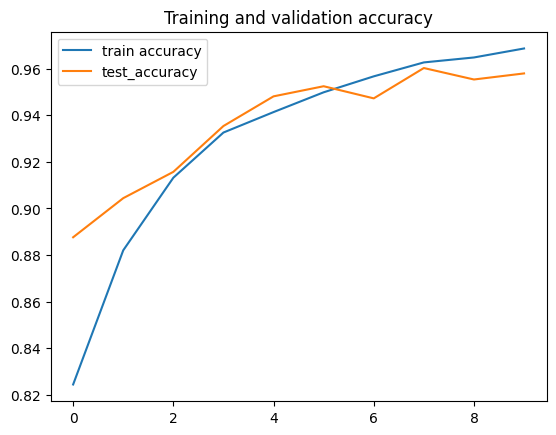

<Figure size 640x480 with 0 Axes>

In [24]:
plt.plot(model.history.history['accuracy'],label='train accuracy')
plt.plot(model.history.history['val_accuracy'],label='test_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

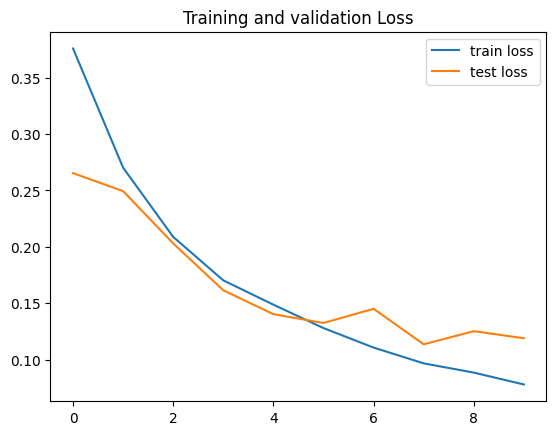

In [25]:
plt.plot(model.history.history['loss'],label='train loss')
plt.plot(model.history.history['val_loss'],label='test loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.show()

In [26]:
print("The Training Accuracy:" ,model.history.history['accuracy'])
print("The Highest Training Accuracy: 0.9640787839889526")
print("\n")
print("The Validation Accuracy" ,model.history.history['val_accuracy'])
print("The Highest Validation Accuracy: 0.9550985097885132")

The Training Accuracy: [0.824353039264679, 0.882000744342804, 0.9131904244422913, 0.9325994849205017, 0.9413866400718689, 0.9498841166496277, 0.9567400813102722, 0.9627269506454468, 0.9648513197898865, 0.9687137603759766]
The Highest Training Accuracy: 0.9640787839889526


The Validation Accuracy [0.887601375579834, 0.9044032692909241, 0.9157010316848755, 0.9353997707366943, 0.9481459856033325, 0.952491283416748, 0.9472769498825073, 0.9603128433227539, 0.9553881883621216, 0.9579953551292419]
The Highest Validation Accuracy: 0.9550985097885132
